In [1]:
!pip install tabula-py
!pip install pdfplumber
!pip install jpype1

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabula import read_pdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 89.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 6.3 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/madhoolikacvss/CSE151A_Project.git


Cloning into 'CSE151A_Project'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 123 (delta 56), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 4.03 MiB | 7.57 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [3]:
!cd CSE151A_Project && git pull

Already up to date.


In [4]:
# CROP is Zooplankton data from 2000 to 2021
fdf = read_pdf("/content/CSE151A_Project/ZooDBCrop.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf)):
  print(len(fdf[i].columns))
  print(fdf[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs = []
for df in fdf:
    df.columns = headers
    cleaned_dfs.append(df)
combined_df = pd.concat(cleaned_dfs, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 1404', 'N/A', '2014-\r04-07', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '19,116.7', '10', 'Pooled'],
      dtype='object')


In [5]:
# CROP2 is Zooplankton data from 1980 to 1999
fdf2 = read_pdf("/content/CSE151A_Project/ZooDBCrop2.pdf",pages = "all", lattice = True)
print("shape of fdf: ",len(fdf[0]))
for i in range(len(fdf2)):
  print(len(fdf2[i].columns))
  print(fdf2[i].columns)

headers = ['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin', 'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source']
cleaned_dfs2 = []
for df in fdf2:
    df.columns = headers
    cleaned_dfs2.append(df)
combined_df2 = pd.concat(cleaned_dfs2, ignore_index=True)

shape of fdf:  25
13
Index(['Cruise', 'Ship', 'Date', 'Line', 'Station', 'Region', 'TowBegin',
       'TowEnd', 'Latitude', 'Longitude', 'Abundance', 'Tows', 'Source'],
      dtype='object')
13
Index(['CALCOFI 9304', 'N/A', '1993-04-\r05', 'N/A.1', 'N/A.2', 'SC', 'N/A.3',
       'N/A.4', 'N/A.5', 'N/A.6', '7,891.3', '10', 'Pooled'],
      dtype='object')


In [6]:
dataset = pd.concat([combined_df, combined_df2], axis=0, ignore_index=True)
print("shape:",dataset.shape)

shape: (62, 13)


In [7]:
# These columns all have N/A value. So we have to drop them.
dataset = dataset.drop(columns=['Tows','TowBegin', 'Ship', 'Source', 'Line',	'TowEnd', 'Longitude', 'Cruise', 'Station',	'Latitude'])
dataset = dataset.dropna()

In [8]:
dataset

,Date,Region,Abundance
0,2000-\r04-13,SC,"30,910.5"
1,2001-\r04-13,SC,"25,181.6"
2,2002-\r04-03,SC,"34,504.3"
3,2003-\r04-10,SC,"71,990.2"
4,2003-\r04-22,CC,"7,878.5"
...,...,...,...
57,1990-04-\r23,SC,"10,784.0"
58,1992-04-\r21,SC,"5,464.0"
59,1994-03-\r29,SC,"9,820.2"
60,1996-04-\r22,SC,"25,972.5"


The data in the column Region is one of the two values 'SC' or 'CC'. It has no order so using One - Hot Encoding. We can use 1 for 'SC' and 0 for 'CC', but by doing this we are giving an order to these values where there is no true zero. That is why we are prefering One Hot Encoding as this data is nominal.

In [9]:
# Binary Encoding
dataset = pd.get_dummies(dataset, columns=['Region'])
dataset['Region'] = dataset['Region_SC']
dataset.drop(['Region_CC', 'Region_SC'], axis=1, inplace=True)
dataset['Region'] = dataset['Region'].astype(int)
dataset

,Date,Abundance,Region
0,2000-\r04-13,"30,910.5",1
1,2001-\r04-13,"25,181.6",1
2,2002-\r04-03,"34,504.3",1
3,2003-\r04-10,"71,990.2",1
4,2003-\r04-22,"7,878.5",0
...,...,...,...
57,1990-04-\r23,"10,784.0",1
58,1992-04-\r21,"5,464.0",1
59,1994-03-\r29,"9,820.2",1
60,1996-04-\r22,"25,972.5",1


In [10]:
# The Date column has "\r" in the date, which is irrelevant so we are cleaning it by replacing "\r" with an empty string.
dataset['Date'] = dataset['Date'].str.replace("\r", "", regex=False)
dataset['Year'] = dataset['Date'].str.extract(r'(\d{4})')
dataset

,Date,Abundance,Region,Year
0,2000-04-13,"30,910.5",1,2000
1,2001-04-13,"25,181.6",1,2001
2,2002-04-03,"34,504.3",1,2002
3,2003-04-10,"71,990.2",1,2003
4,2003-04-22,"7,878.5",0,2003
...,...,...,...,...
57,1990-04-23,"10,784.0",1,1990
58,1992-04-21,"5,464.0",1,1992
59,1994-03-29,"9,820.2",1,1994
60,1996-04-22,"25,972.5",1,1996


In [11]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       62 non-null     object
 1   Abundance  62 non-null     object
 2   Region     62 non-null     int64 
 3   Year       62 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


,Date,Abundance,Region,Year
0,2000-04-13,"30,910.5",1,2000
1,2001-04-13,"25,181.6",1,2001
2,2002-04-03,"34,504.3",1,2002
3,2003-04-10,"71,990.2",1,2003
4,2003-04-22,"7,878.5",0,2003
...,...,...,...,...
57,1990-04-23,"10,784.0",1,1990
58,1992-04-21,"5,464.0",1,1992
59,1994-03-29,"9,820.2",1,1994
60,1996-04-22,"25,972.5",1,1996


In [12]:
# Converting the date into fractional year format so this can be used in the Abundance model
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset['Fractional_Year'] = (
    dataset['Date'].dt.year
    + (dataset['Date'].dt.dayofyear - 1)
    / dataset['Date'].dt.is_leap_year.apply(lambda x: 366 if x else 365)
)
dataset

,Date,Abundance,Region,Year,Fractional_Year
0,2000-04-13,"30,910.5",1,2000,2000.281421
1,2001-04-13,"25,181.6",1,2001,2001.279452
2,2002-04-03,"34,504.3",1,2002,2002.252055
3,2003-04-10,"71,990.2",1,2003,2003.271233
4,2003-04-22,"7,878.5",0,2003,2003.304110
...,...,...,...,...,...
57,1990-04-23,"10,784.0",1,1990,1990.306849
58,1992-04-21,"5,464.0",1,1992,1992.303279
59,1994-03-29,"9,820.2",1,1994,1994.238356
60,1996-04-22,"25,972.5",1,1996,1996.306011


In [13]:
dataset['Abundance'] = dataset['Abundance'].str.replace(',', '', regex=False)
dataset['Abundance'] = pd.to_numeric(dataset['Abundance'], errors='coerce')

In [14]:
dataset

,Date,Abundance,Region,Year,Fractional_Year
0,2000-04-13,30910.5,1,2000,2000.281421
1,2001-04-13,25181.6,1,2001,2001.279452
2,2002-04-03,34504.3,1,2002,2002.252055
3,2003-04-10,71990.2,1,2003,2003.271233
4,2003-04-22,7878.5,0,2003,2003.304110
...,...,...,...,...,...
57,1990-04-23,10784.0,1,1990,1990.306849
58,1992-04-21,5464.0,1,1992,1992.303279
59,1994-03-29,9820.2,1,1994,1994.238356
60,1996-04-22,25972.5,1,1996,1996.306011


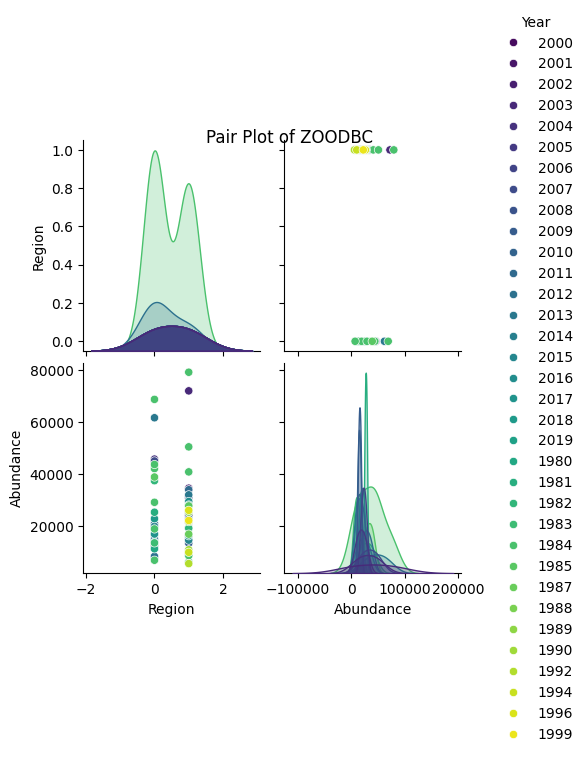

In [15]:
#Pairplot
sns.pairplot(dataset, vars=["Region", "Abundance"], hue="Year", palette="viridis")
# Color coded by Date, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of ZOODBC", y=1)
plt.show()

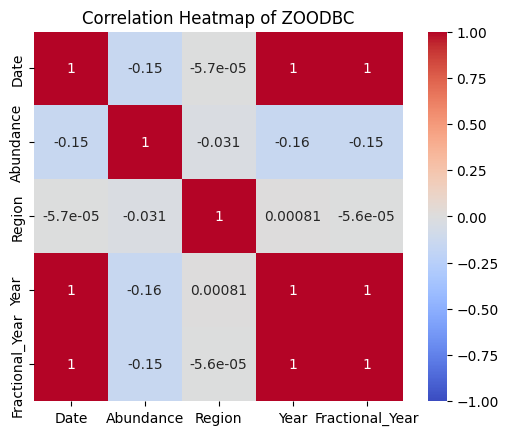

In [16]:
matrix = dataset.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of ZOODBC")
plt.show()

# Abundance Model
So our first dataset that contains columns 'Abundance' and 'Year' has only 62 rows where as our second dataset has 1374 rows. We want to use the columns/ features such as "Depth", "Salinity", "Temp", "d13C-DIC", "DIC", "ALK" from the second dataset to predict the 'Abundance'.

The problem we have now is that we have to map the 'Abundance' from 62 rows(62 different points of time) to the 1374 samples in the second dataset. For this we have to assign a value for each of these samples based on the year (calculated from date) and assign an 'Abundance' value to that sample.

So we have created a regression model that predicts the 'Abundance' given a 'Year' based on our first dataset and assign the predict values of 'Abundance' to the corresponding samples in the second dataset.

## Why a model instead of directly mapping the 'Abundance' from the first dataset?

While we can just map the 'Abundance' from the first dataset, for instance the value of 'Abundance' in the year 2000 is 30910.5 and we can assign 30910.5 as the Abundance to all the samples from the second dataset with year 2000, it is not the best solution we can have as we assign the same Abundance values to all the samples in the same year.

To solve this, we plan on further improving the model in Milestone 4 by predicting 'Abundance' based on the date so we can get different 'Abundance' values for different samples belonging to the same year. This can be done by using a fractional year format for the dates such as June 22, 1989 can be 1989.474 .

For this reason using a model to predict abundance as we can modify it later to adapt to dates instead of year.

##Milestone 3:Training abundance model - used to train our final model

PS: an improved version of this model is below, titled 'Milstone 4 ...'

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error
# Preparing the dataset
X = dataset[['Year']]  # Feature
y = dataset['Abundance']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
abundanceModel = LinearRegression()
abundanceModel.fit(X_train, y_train)

# Making predictions
y_pred = abundanceModel.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {maep}")

# Displaying the model coefficients
print(f"Intercept: {abundanceModel.intercept_}")
print(f"Coefficient: {abundanceModel.coef_[0]}")

Mean Squared Error: 375661987.1526339
Mean Absolute Error: 14481.238518777756
Mean Absolute Percentage Error: 0.7111288684011104
Intercept: 266961.3260319692
Coefficient: -121.09971389333944


#DATASET 2 (BATA+BERM+HAWI):

# What is Dataset 2
The dataset includes key columns: Station, Depth, Salinity. To facilitate analysis, we applied Min-Max normalization to the continuous variables: Depth, Salinity, Temp, d13C-DIC, DIC, and ALK, scaling them to a range of 0 to 1. This ensures all features can be compared fairly and prevents any single variable from skewing our results.



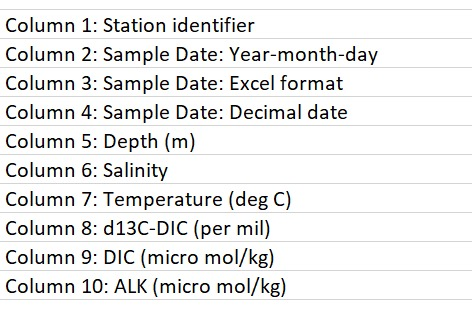

In [18]:
!cd CSE151A_Project/ && ls


 BATS.csv		       HAWI.csv       LDL_2023.csv   Project.ipynb   ZooDBCrop2.pdf
 BERM.csv		       LDL_2021.csv   LDL_2024.csv   README.md	     ZooDBCrop.pdf
'CSE 151A ZooDB Results.csv'   LDL_2022.csv  'Meeting Log'   ZooDB-2.pdf     ZooDB.pdf


In [19]:
!cd CSE151A_Project && git pull

Already up to date.


In [20]:
# BATS(1)
dataset2 = pd.read_csv('/content/CSE151A_Project/BATS.csv')
print(dataset2.columns)

# BERM
dataset3 = pd.read_csv('/content/CSE151A_Project/BERM.csv')
print(dataset3.columns)

# HAWI
dataset4 = pd.read_csv('/content/CSE151A_Project/HAWI.csv')
print(dataset4.columns)

combined_dataset = pd.concat([dataset2, dataset3, dataset4], ignore_index=True)

Index(['Station', ' Sample', '  Excel', 'Date', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')
Index(['Station', ' Sample', '  Excel', ' Decimal', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')
Index(['Station', ' Sample', '  Excel', ' Decimal', ' Depth', '   Salinity',
       '    Temp', ' d13C-DIC', '  DIC', '   ALK'],
      dtype='object')


In [21]:
combined_dataset = combined_dataset.drop(columns=['Station', '  Excel', ' Decimal' , 'Date'])


In [22]:
combined_dataset


,Sample,Depth,Salinity,Temp,d13C-DIC,DIC,ALK
0,1989-01-29,18,36.645,20.79,1.48,2039.48,2395.04
1,1990-06-22,1,36.456,24.99,1.36,2031.94,2384.17
2,1990-06-22,10,36.467,24.33,1.4,2031.79,2378.03
3,1990-07-18,2,36.456,27.35,1.38,2030.62,2378.91
4,1990-07-18,10,36.454,27.25,1.39,2030.89,2377.16
...,...,...,...,...,...,...,...
1376,2016-04-14,5,34.9048,NaN,0.857,1985.86,2299.36
1377,2016-07-11,5,34.8889,NaN,0.896,1986.13,2300.035
1378,2016-08-09,5,34.8994,NaN,0.818,1987.6,2296.475
1379,2016-10-15,5,34.9704,NaN,0.881,1987.44,2301.61


In [23]:
combined_dataset = combined_dataset.rename(columns={
    " Sample": "Sample",
    " Depth": "Depth",
    "   Salinity": "Salinity",
    "    Temp": "Temp",
    " d13C-DIC": "d13C-DIC",
    "  DIC": "DIC",
    "   ALK": "ALK"
})


In [24]:
combined_dataset.columns = combined_dataset.columns.str.strip()


In [25]:
# Remove leading and trailing spaces from the 'Sample' column
combined_dataset['Sample'] = combined_dataset['Sample'].str.strip()
combined_dataset['Date'] = pd.to_datetime(combined_dataset['Sample'], format='%Y-%m-%d')
combined_dataset['Year'] = combined_dataset['Sample'].str.extract(r'(\d{4})')
combined_dataset.drop(columns=['Sample'], inplace=True)
combined_dataset.columns = combined_dataset.columns.str.strip()


In [26]:
combined_dataset.loc[:,combined_dataset.columns != 'Date'] = combined_dataset.loc[:,combined_dataset.columns != 'Date'].apply(pd.to_numeric, errors='coerce')
combined_dataset

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Date,Year
0,18.0,36.645,20.79,1.48,2039.48,2395.04,1989-01-29,1989
1,1.0,36.456,24.99,1.36,2031.94,2384.17,1990-06-22,1990
2,10.0,36.467,24.33,1.4,2031.79,2378.03,1990-06-22,1990
3,2.0,36.456,27.35,1.38,2030.62,2378.91,1990-07-18,1990
4,10.0,36.454,27.25,1.39,2030.89,2377.16,1990-07-18,1990
...,...,...,...,...,...,...,...,...
1376,5.0,34.9048,NaN,0.857,1985.86,2299.36,2016-04-14,2016
1377,5.0,34.8889,NaN,0.896,1986.13,2300.035,2016-07-11,2016
1378,5.0,34.8994,NaN,0.818,1987.6,2296.475,2016-08-09,2016
1379,5.0,34.9704,NaN,0.881,1987.44,2301.61,2016-10-15,2016


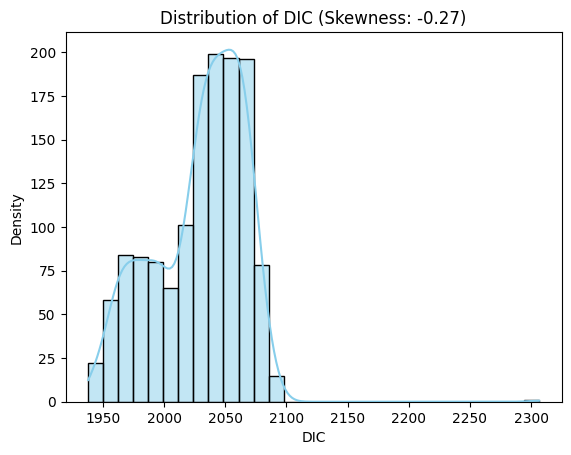

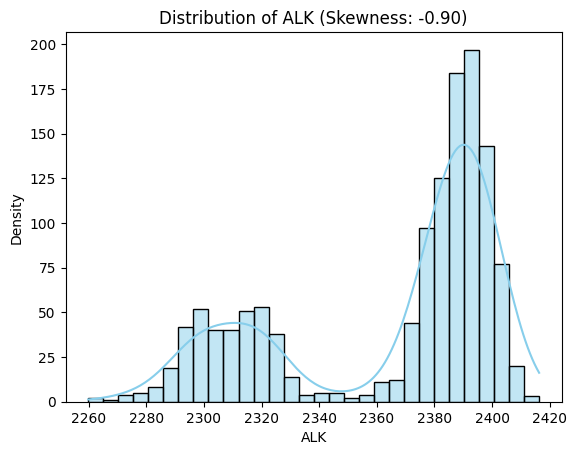

In [27]:
from scipy.stats import skew

columns_of_interest = ['DIC', 'ALK']

# Convert columns to numeric values (force errors to NaN if non-numeric)
combined_dataset[columns_of_interest] = combined_dataset[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Now plot the histogram with KDE
for col in columns_of_interest:
    # Plot the histogram with KDE
    sns.histplot(combined_dataset[col].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col} (Skewness: {skew(combined_dataset[col].dropna()):.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()



In [28]:
#from Milestone 3: feature expantion, adding a column for the ratio of DIC and ALK - it hels in capturing carbonate equilibrium
combined_dataset = combined_dataset[combined_dataset['ALK'] != 0]
combined_dataset['DIC_ALK_Ratio'] = combined_dataset['DIC'] / combined_dataset['ALK']

combined_dataset

,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Date,Year,DIC_ALK_Ratio
0,18.0,36.645,20.79,1.48,2039.48,2395.040,1989-01-29,1989,0.851543
1,1.0,36.456,24.99,1.36,2031.94,2384.170,1990-06-22,1990,0.852263
2,10.0,36.467,24.33,1.4,2031.79,2378.030,1990-06-22,1990,0.854400
3,2.0,36.456,27.35,1.38,2030.62,2378.910,1990-07-18,1990,0.853593
4,10.0,36.454,27.25,1.39,2030.89,2377.160,1990-07-18,1990,0.854335
...,...,...,...,...,...,...,...,...,...
1376,5.0,34.9048,NaN,0.857,1985.86,2299.360,2016-04-14,2016,0.863658
1377,5.0,34.8889,NaN,0.896,1986.13,2300.035,2016-07-11,2016,0.863522
1378,5.0,34.8994,NaN,0.818,1987.60,2296.475,2016-08-09,2016,0.865500
1379,5.0,34.9704,NaN,0.881,1987.44,2301.610,2016-10-15,2016,0.863500


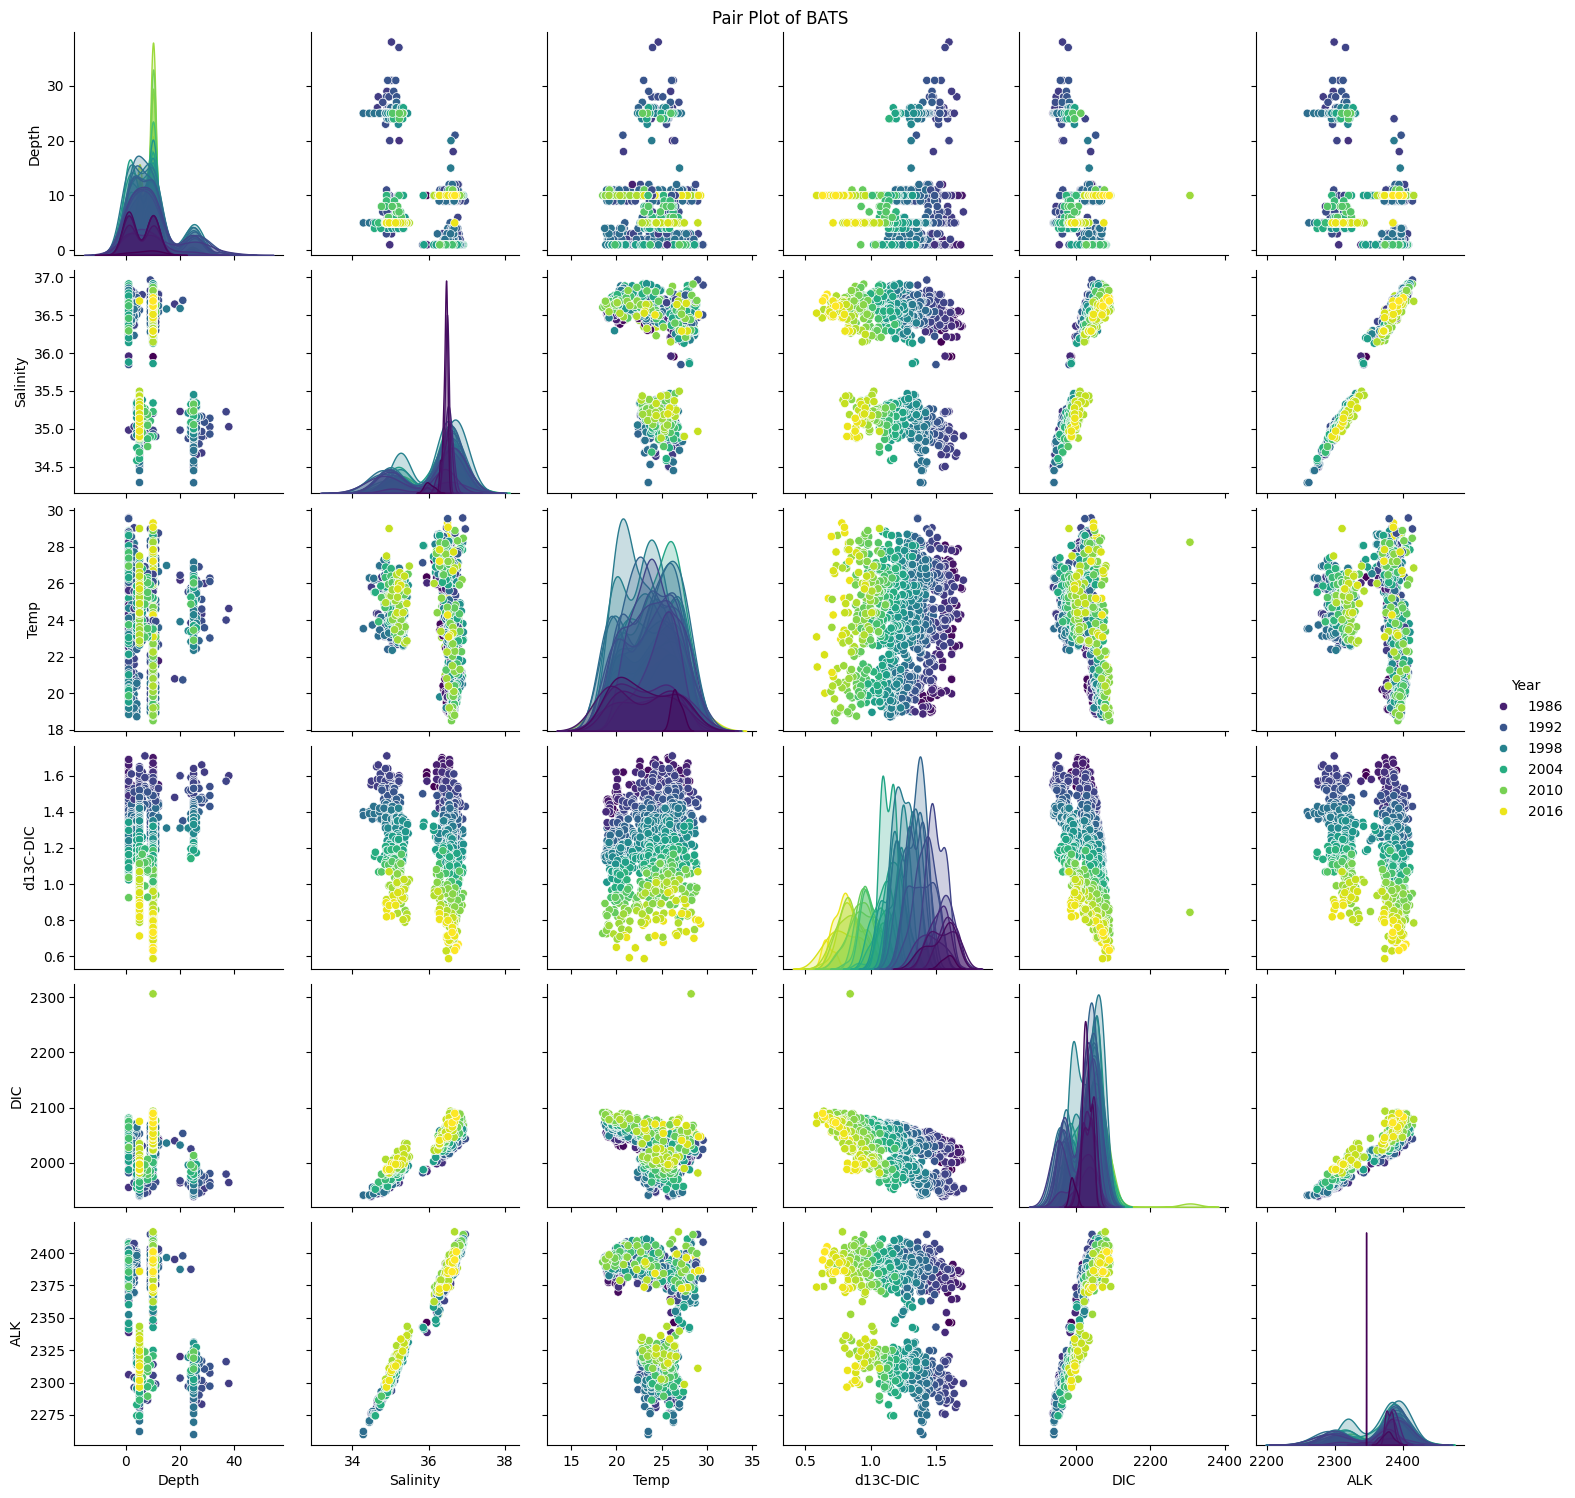

In [29]:
#Pairplot
sns.pairplot(combined_dataset, vars=["Depth", "Salinity", "Temp", "d13C-DIC", "DIC", "ALK"], hue="Year", palette="viridis")
# Color coded by Year, can change to other column to observe chnages from different perspectives
plt.suptitle("Pair Plot of BATS", y=1)
plt.show()

In [30]:
# from sklearn.preprocessing import MinMaxScaler
# numeric_columns = ['Depth', 'Salinity', 'Temp', 'd13C-DIC', 'DIC', 'ALK']
# combined_dataset[numeric_columns] = combined_dataset.groupby('Year')[numeric_columns].transform(lambda x: x.fillna(x.mean())).infer_objects()

# # Apply MinMaxScaler
# scaler = MinMaxScaler()
# combined_dataset[numeric_columns] = scaler.fit_transform(combined_dataset[numeric_columns])


#Milestone 3 version: Training our first model

In [31]:
# Creating a column abundance in combined_dataset based on abundanceModel prediction on year
combined_dataset['Abundance'] = abundanceModel.predict(combined_dataset['Year'].values.reshape(-1, 1))
combined_dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Date,Year,DIC_ALK_Ratio,Abundance
0,18.0,36.645,20.79,1.48,2039.48,2395.040,1989-01-29,1989,0.851543,26093.995098
1,1.0,36.456,24.99,1.36,2031.94,2384.170,1990-06-22,1990,0.852263,25972.895384
2,10.0,36.467,24.33,1.4,2031.79,2378.030,1990-06-22,1990,0.854400,25972.895384
3,2.0,36.456,27.35,1.38,2030.62,2378.910,1990-07-18,1990,0.853593,25972.895384
4,10.0,36.454,27.25,1.39,2030.89,2377.160,1990-07-18,1990,0.854335,25972.895384
...,...,...,...,...,...,...,...,...,...,...
1376,5.0,34.9048,NaN,0.857,1985.86,2299.360,2016-04-14,2016,0.863658,22824.302823
1377,5.0,34.8889,NaN,0.896,1986.13,2300.035,2016-07-11,2016,0.863522,22824.302823
1378,5.0,34.8994,NaN,0.818,1987.60,2296.475,2016-08-09,2016,0.865500,22824.302823
1379,5.0,34.9704,NaN,0.881,1987.44,2301.610,2016-10-15,2016,0.863500,22824.302823


In [32]:
# Dropping additional na values
# Checking for NaN values in the dataset
nan_summary = combined_dataset.isnull().sum()

# Displaying columns with their respective count of NaN values
print("NaN values in each column:")
print(nan_summary)

# Optionally, filter columns that contain NaN values
nan_columns = nan_summary[nan_summary > 0]
print("\nColumns with NaN values:")
print(nan_columns)

combined_dataset = combined_dataset.dropna()
print(combined_dataset.shape)

NaN values in each column:
Depth              3
Salinity          29
Temp              73
d13C-DIC         126
DIC               15
ALK               79
Date               0
Year               0
DIC_ALK_Ratio     84
Abundance          0
dtype: int64

Columns with NaN values:
Depth              3
Salinity          29
Temp              73
d13C-DIC         126
DIC               15
ALK               79
DIC_ALK_Ratio     84
dtype: int64
(1127, 10)


In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,explained_variance_score,r2_score

# extracting our feature vector from the combined_dataset (BATS+BERM+HAWI)
# extracting our lable's vector from Zooplankton dataset
X = combined_dataset[['Depth', 'Salinity', 'Temp', 'd13C-DIC', 'DIC', 'ALK']]
y = combined_dataset['Abundance']

# combined_dataset has 1381 rows/samples where as dataset has only 62 rows/samples.
# Either map Abundance from the dataset to each sample in combined_dataset based on Year
# Or map average values of ['DIC', 'ALK', 'Depth', 'Salinity', 'Temp', 'd13C-DIC'] over a year to each year's abundance in dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_val_pred = model.predict(X_val) # Prediction for
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_maep = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs = explained_variance_score(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

validation_mse = mean_squared_error(y_val, y_val_pred)
validation_mae = mean_absolute_error(y_val, y_val_pred)
validation_maep = mean_absolute_percentage_error(y_val, y_val_pred)
validation_evs = explained_variance_score(y_val, y_val_pred)
validation_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_maep = mean_absolute_percentage_error(y_train, y_train_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nValidation Metrics:")
print(f"Validation Mean Squared Error: {validation_mse:.12f}")
print(f"Validation Mean Absolute Error (MAE): {validation_mae}")
print(f"Validation Mean Absolute Error Percentage (MAE): {validation_maep}")
print(f"Validation Explained Variance Score: {validation_evs}")
print(f"Validation R-squared: {validation_r2:.2f}")


print("\nTest Metrics:")
print(f"Test Mean Squared Error: {test_mse:.12f}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")
print(f"Test Mean Absolute Error Percentage (MAE): {test_maep}")
print(f"Test Explained Variance Score: {test_evs}")
print(f"Test R-squared: {test_r2:.2f}")

print("\nTrain Metrics:")
print(f"Train Mean Squared Error: {train_mse:.12f}")
print(f"Train Mean Absolute Error (MAE): {train_mae}")
print(f"Train Mean Absolute Error Percentage (MAE): {train_maep}")
print(f"Train Explained Variance Score: {train_evs}")
print(f"Train R-squared: {train_r2:.2f}")


Validation Metrics:
Validation Mean Squared Error: 43478.783027629608
Validation Mean Absolute Error (MAE): 164.02335749270026
Validation Mean Absolute Error Percentage (MAE): 0.006570758945158506
Validation Explained Variance Score: 0.9521287848992883
Validation R-squared: 0.95

Test Metrics:
Test Mean Squared Error: 42933.529533730565
Test Mean Absolute Error (MAE): 155.84573697227248
Test Mean Absolute Error Percentage (MAE): 0.006177019157039742
Test Explained Variance Score: 0.9541185466695979
Test R-squared: 0.95

Train Metrics:
Train Mean Squared Error: 42111.881525698358
Train Mean Absolute Error (MAE): 161.10599926024358
Train Mean Absolute Error Percentage (MAE): 0.006454471536266119
Train Explained Variance Score: 0.9469825184598439
Train R-squared: 0.95


# START OF MILESTONE 4

#Milestone 4 Part 1: training our second model
## Second Abundance model
We are using 2 models for our project - one for predicting missing abundances (as an alternative for intrapolation) and one for predicting abundances based on pollution features. For milestone 3 we had made a simple linear regression model. But for milestone 4, we changed that to botstrapping method - to increase the accuracy of our model.

In [34]:
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Preparing the dataset
X = dataset[['Fractional_Year']].values  # Feature
y = dataset['Abundance'].values  # Target

n_bootstraps = 100
best_abundance_model = None
best_maep = float('inf')  # Initialize with infinity
best_coefficients = None
best_intercept = None

for i in range(n_bootstraps):
    # Creating bootstrap sample
    X_bootstrap, y_bootstrap = resample(X, y, replace=True, random_state=i)

    # Splitting into train-test sets from bootstrap
    X_train = X_bootstrap[:int(0.8 * len(X_bootstrap))]
    y_train = y_bootstrap[:int(0.8 * len(y_bootstrap))]
    X_test = X_bootstrap[int(0.8 * len(X_bootstrap)):]
    y_test = y_bootstrap[int(0.8 * len(y_bootstrap)):]

    # Creating and training the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    maep = mean_absolute_percentage_error(y_test, y_pred)

    # Check if this model is the best so far
    if maep < best_maep:
        best_maep = maep
        best_abundance_model = model
        best_coefficients = model.coef_
        best_intercept = model.intercept_

# Displaying the best model details
print(f"Best Mean Absolute Percentage Error: {best_maep}")
print(f"Best Model Intercept: {best_intercept}")
print(f"Best Model Coefficient: {best_coefficients[0]}")


Best Mean Absolute Percentage Error: 0.2740094873500976
Best Model Intercept: -59194.34233117939
Best Model Coefficient: 41.11888870156808


#Feature Expansion: Carbon Storage Potential
Carbon storage potential measures a marine system's ability to absorb and retain carbon, primarily as bicarbonate ( HCO_3^- ) and carbonate ( CO_3^{2-} ) ions, influenced by factors like alkalinity (ALK), dissolved inorganic carbon (DIC), and depth. Higher values indicate a greater capacity to buffer against ocean acidification and sequester atmospheric \( CO_2 \), particularly in productive or shallow regions.

In [35]:
# Feature expansion: Carbon Storage Potential that measures
combined_dataset['Carbon_Storage_Potential'] = combined_dataset['ALK']*combined_dataset['DIC']/combined_dataset['DIC']
combined_dataset

<ipython-input-35-82b9b3bf6076>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataset['Carbon_Storage_Potential'] = combined_dataset['ALK']*combined_dataset['DIC']/combined_dataset['DIC']


,Depth,Salinity,Temp,d13C-DIC,DIC,ALK,Date,Year,DIC_ALK_Ratio,Abundance,Carbon_Storage_Potential
0,18.0,36.645,20.79,1.48,2039.48,2395.040,1989-01-29,1989,0.851543,26093.995098,2395.040
1,1.0,36.456,24.99,1.36,2031.94,2384.170,1990-06-22,1990,0.852263,25972.895384,2384.170
2,10.0,36.467,24.33,1.4,2031.79,2378.030,1990-06-22,1990,0.854400,25972.895384,2378.030
3,2.0,36.456,27.35,1.38,2030.62,2378.910,1990-07-18,1990,0.853593,25972.895384,2378.910
4,10.0,36.454,27.25,1.39,2030.89,2377.160,1990-07-18,1990,0.854335,25972.895384,2377.160
...,...,...,...,...,...,...,...,...,...,...,...
1362,5.0,34.8999,27.5,0.914,1989.23,2298.550,2014-09-13,2014,0.865428,23066.502251,2298.550
1363,5.0,34.966658,29.0,1.068,1981.06,2310.980,2014-10-12,2014,0.857238,23066.502251,2310.980
1364,5.0,35.36985,26.4,0.97,2001.42,2328.125,2014-11-20,2014,0.859670,23066.502251,2328.125
1371,5.0,35.2748,25.9,0.958,1995.92,2333.550,2015-10-13,2015,0.855315,22945.402537,2333.550


In [36]:
# Dropping additional na values
# Checking for NaN values in the dataset
nan_summary = combined_dataset.isnull().sum()

# Displaying columns with their respective count of NaN values
print("NaN values in each column:")
print(nan_summary)

# Optionally, filter columns that contain NaN values
nan_columns = nan_summary[nan_summary > 0]
print("\nColumns with NaN values:")
print(nan_columns)

combined_dataset = combined_dataset.dropna()
print(combined_dataset.shape)

NaN values in each column:
Depth                       0
Salinity                    0
Temp                        0
d13C-DIC                    0
DIC                         0
ALK                         0
Date                        0
Year                        0
DIC_ALK_Ratio               0
Abundance                   0
Carbon_Storage_Potential    0
dtype: int64

Columns with NaN values:
Series([], dtype: int64)
(1127, 11)


##Milestone 4: added new features - fractional year, seasons, cluster based on salinity and Alk levels
- this is for the second data set

   Fractional_Year  Season_Numeric
0      1989.076712               0
1      1990.471233               1
2      1990.471233               1
3      1990.542466               2
4      1990.542466               2


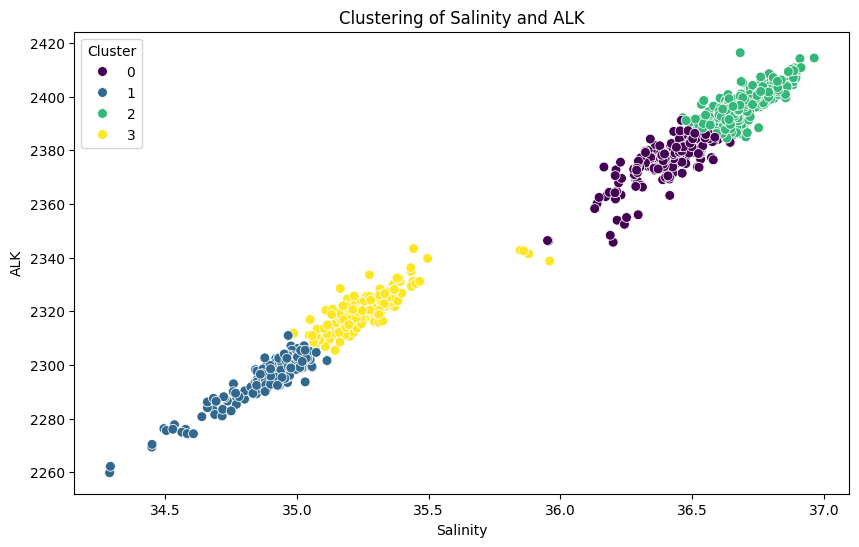

In [37]:
# Calculating fractional year
combined_dataset['Fractional_Year'] = (
    combined_dataset['Date'].dt.year
    + (combined_dataset['Date'].dt.dayofyear - 1)
    / combined_dataset['Date'].dt.is_leap_year.apply(lambda x: 366 if x else 365)
)

# Calculate Seasons based on date
# Function to determine the season based on the fractional part of the year
def assign_season(fractional_year):
    fractional_part = fractional_year % 1  # Extract fractional part of the year
    if 0.0 <= fractional_part < 0.25:  # Winter (Jan 1 - Mar 31)
        return 'Winter'
    elif 0.25 <= fractional_part < 0.5:  # Spring (Apr 1 - Jun 30)
        return 'Spring'
    elif 0.5 <= fractional_part < 0.75:  # Summer (Jul 1 - Sep 30)
        return 'Summer'
    else:  # Fall (Oct 1 - Dec 31)
        return 'Fall'

combined_dataset['Season'] = combined_dataset['Fractional_Year'].apply(assign_season)
# a mapping for seasons to numbers
season_to_number = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}
combined_dataset['Season_Numeric'] = combined_dataset['Season'].map(season_to_number)
combined_dataset['Season'] = pd.Categorical(combined_dataset['Season'],
                                            categories=['Winter', 'Spring', 'Summer', 'Fall'],
                                            ordered=True)
combined_dataset = combined_dataset.drop(columns=['Season'])
print(combined_dataset[['Fractional_Year', 'Season_Numeric']].head())

combined_dataset.loc[:,combined_dataset.columns != 'Date'] = combined_dataset.loc[:,combined_dataset.columns != 'Date'].apply(pd.to_numeric, errors='coerce')
combined_dataset

# Clustering data points based on salinity and ALK levels
from sklearn.cluster import KMeans
import seaborn as sns

data_for_clustering = combined_dataset[['Salinity', 'ALK']].dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=4, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_normalized)

combined_dataset.loc[data_for_clustering.index, 'Cluster'] = data_for_clustering['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Salinity',
    y='ALK',
    hue='Cluster',
    data=data_for_clustering,
    palette='viridis',
    s=50
)
plt.title('Clustering of Salinity and ALK')
plt.xlabel('Salinity')
plt.ylabel('ALK')
plt.legend(title='Cluster')
plt.show()

combined_dataset['Cluster'] = combined_dataset['Cluster'].fillna(-1).astype(int)



In [38]:
# Creating a column abundance in combined_dataset based on abundanceModel prediction on year
combined_dataset['Abundance'] = best_abundance_model.predict(combined_dataset['Fractional_Year'].values.reshape(-1, 1))
combined_dataset

dataset = dataset.sort_values(by='Fractional_Year', ascending=True)
dataset.reset_index(drop=True, inplace=True)
#dataset

In [39]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['Salinity', 'Temp', 'd13C-DIC','DIC_ALK_Ratio', 'Season_Numeric', 'Cluster', 'Carbon_Storage_Potential']
combined_dataset[numeric_columns] = combined_dataset.groupby('Year')[numeric_columns].transform(lambda x: x.fillna(x.mean())).infer_objects()

# Apply MinMaxScaler
scaler = MinMaxScaler()
combined_dataset[numeric_columns] = scaler.fit_transform(combined_dataset[numeric_columns])

<ipython-input-39-2634cf7560c8>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_dataset[numeric_columns] = combined_dataset.groupby('Year')[numeric_columns].transform(lambda x: x.fillna(x.mean())).infer_objects()
<ipython-input-39-2634cf7560c8>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_dataset[numeric_columns] = combined_dataset.groupby('Year')[numeric_columns].transform(lambda x: x.fillna(x.mean())).infer_objects()
<ipython-input-39-2634cf7560c8>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is de

# Milestone 4: trying a new model to see if our accuracy improves (ElasticNet)

Mean Squared Error: 120093617.40425721
Mean Absolute Error: 8260.954207096058
Mean Absolute Percentage Error: 0.5309773201224828
Train MSE for each fold: [38565.0537537  40494.36718402 40108.8262212  40274.79349042]
Test MSE for each fold: [49297.55750247 34101.61424316 37795.79749319 40170.26627811]
Mean Train MSE: 39860.76
Mean Test MSE: 40341.31


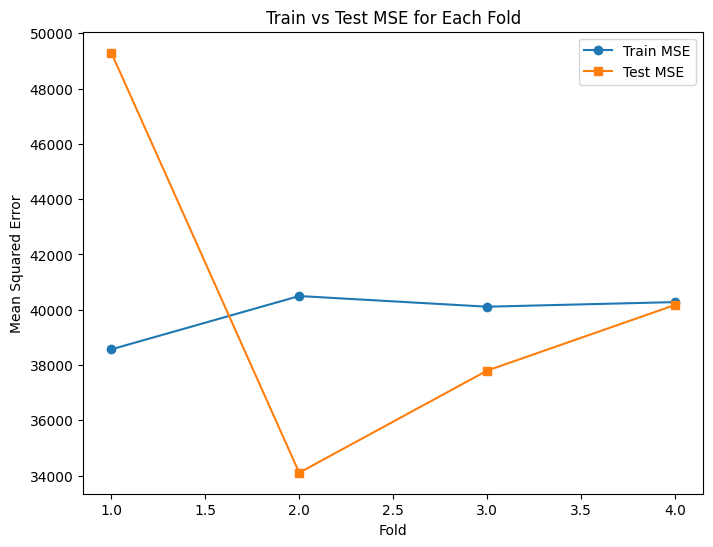

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error

# Extracting feature vector from combined_dataset
X = combined_dataset[['Salinity', 'Temp', 'd13C-DIC','DIC_ALK_Ratio', 'Season_Numeric', 'Cluster', 'Carbon_Storage_Potential']]
y = combined_dataset['Abundance']

# Create the ElasticNet model with L1 and L2 regularization
model = ElasticNet(
    alpha=0.2,              # Regularization strength
    l1_ratio= 0.666,           # Balance between L1 (Lasso) and L2 (Ridge)
    max_iter=1000,          # Maximum number of iterations for optimization
    random_state=21         # Ensures reproducibility
)

# Set up K-fold cross-validation (e.g., 5-fold)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Perform cross-validation and calculate performance metrics
cv_results = cross_validate(
    model, X, y, cv=kf,
    scoring='neg_mean_squared_error',  # Use negative MSE for interpretation
    return_train_score=True
)

# Convert negative MSE to positive for interpretation
train_mse = -cv_results['train_score']
test_mse = -cv_results['test_score']
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
maep = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {maep}")



# Displaying results
print("Train MSE for each fold:", train_mse)
print("Test MSE for each fold:", test_mse)
print(f"Mean Train MSE: {train_mse.mean():.2f}")
print(f"Mean Test MSE: {test_mse.mean():.2f}")


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_mse) + 1), train_mse, label='Train MSE', marker='o')
plt.plot(range(1, len(test_mse) + 1), test_mse, label='Test MSE', marker='s')

# Adding labels and title
plt.title('Train vs Test MSE for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()

# Show the plot
plt.show()


#Milestone 4: part 3
Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?


**Answer:**

Our model shows some signs of overfitting. The average Train MSE is 926,082.90, while the average Test MSE is slightly higher at 937,254.36. The average Train MAE is -790.63, and the Test MAE is similar at -794.27, indicating that while the model performs well on training data, its performance on test data is comparable, suggesting overfitting has minimal impact. The R² values for both the train (0.58) and test (0.58) sets are also close, further indicating that the model generalizes reasonably well despite some overfitting. To improve, we may consider feature selection or dimensionality reduction techniques like PCA to reduce multicollinearity and improve generalization.
Using PCA can help mitigate overfitting by reducing the number of features and focusing the model on the most important patterns in the data. This leads to a simpler, more efficient model that is better equipped to generalize to new, unseen data. By applying PCA, you can maintain the predictive power of your model while reducing its complexity and susceptibility to overfitting.


#Conclusion

Our second model utilized the principles of overfitting as indicated by the low and consistent training MSE compared to the fluctuating and initially higher testing MSE. While the combination of L1 and L2 regularization in Elastic Net helped control overfitting to some extent, it did not fully resolve the issue. This suggests that additional feature engineering or hyperparameter tuning may be necessary to improve model generalization, and reduce overfitting.

In contrast, for our first model, we used linear regression and concluded that our model performs well with low errors on both training and testing datasets, showing no signs of overfitting or underfitting. This is probably, in part, due to the fact that our testing for overfitting was not as comprehensive. While linear regression provided a solid baseline, the second model's apparent overfitting highlights the need for more robust evaluation and tuning strategies.

To enhance performance, further techniques such as feature selection or dimensionality reduction could be explored to remove redundant features and mitigate multicollinearity. Additional hyperparameter optimization for the Elastic Net's alpha and l1_ratio parameters may also help strike a better balance between bias and variance.

